## 1.a

precision is the number of significant figures to which a value can be measured

## 1.b

Accuracy is the measurement to match the actual value of the quantity to being measured

## 1.c

Systematic error is the error recieved from a repeated mistake or inadequate application of the underlying theoretical and mathematical discription of the system

## 1.d

Random error is the unpredictable changes that occur that are, for the most part, outside of ourr  control

## 1.e

Round-off error is the just the accumulation of error being carried over due to the computer itself not having exact values and using a finite number of digits in the calculation

## 1.f

Deviation is standard uncertainty of the set of measured values that describes how much the individual data points vary with respect from each other

## 2.a,b,c

Use eq.6:
$$\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}$$
rearranged to:
$$ N=\frac{\sigma^2}{\sigma_{\bar{x}}^2}$$

In [8]:
a=0.2**2/0.01**2
b=0.2**2/0.001**2
c=0.2**2/0.0001**2

print(f"a) +- 1.0% {a:.0f}")
print(f"b) +- 0.10% {b:,.0f}")
print(f"c) +- 0.010% {c:,.0f}")

a) +- 1.0% 400
b) +- 0.10% 40,000
c) +- 0.010% 4,000,000


## 3

## a

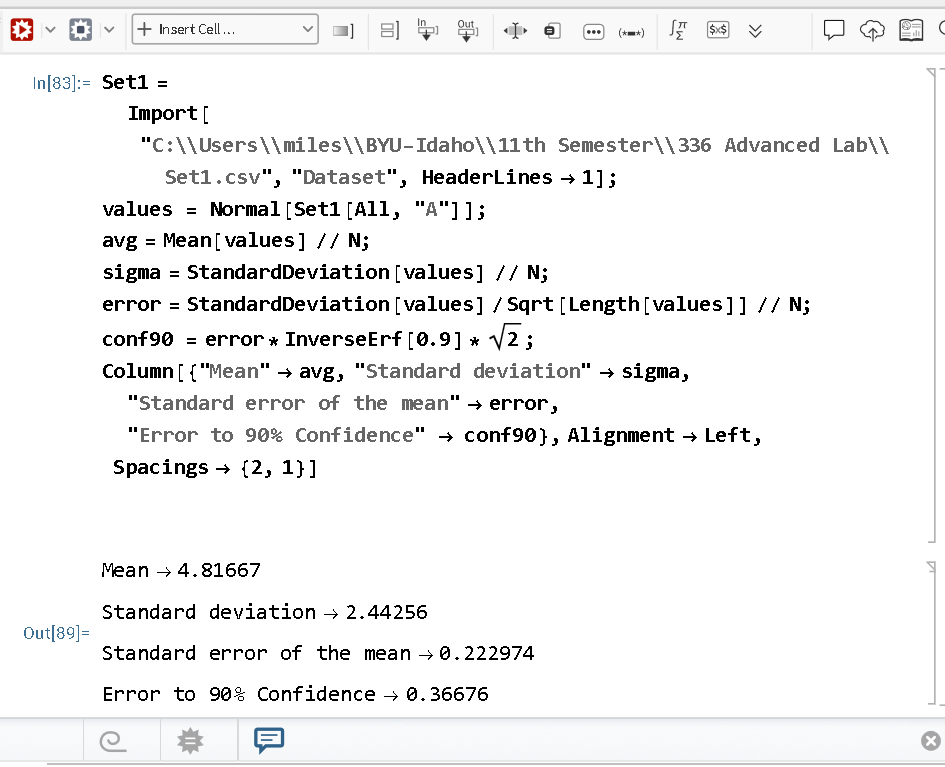

## b

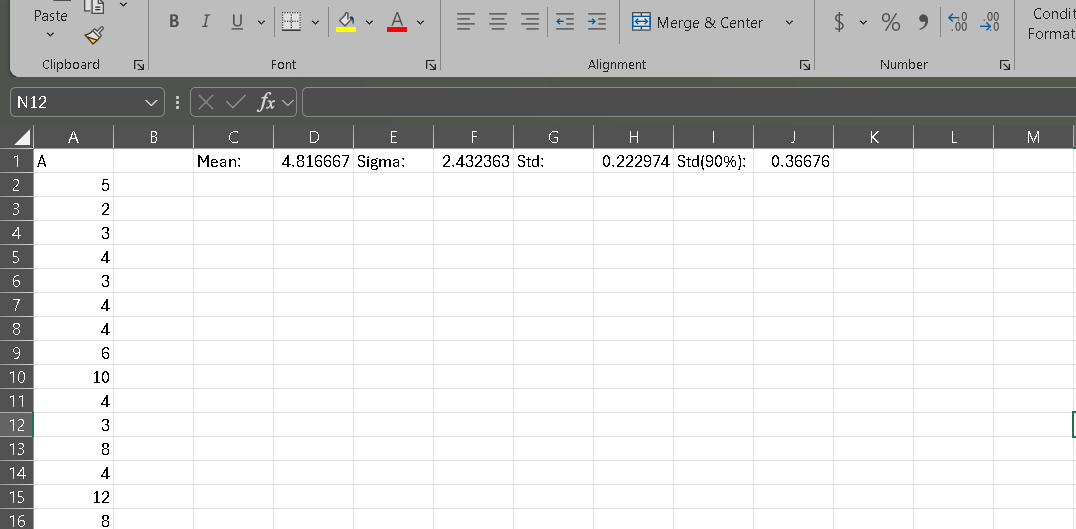

## c

In [54]:
from pandas import read_csv
from numpy import sqrt
from scipy.special import erf, erfinv

Set1 = read_csv("Set1.csv")
xbar=Set1["A"].mean()
sigma=Set1["A"].std()
sigma_xbar=sigma/sqrt(len(Set1["A"]))

n=sqrt(2)*erfinv(0.9)*sigma_xbar
n1=sqrt(2)*erfinv(1)

print(f"Mean value: {xbar:.2f}")
print(f"Uncertainty value: {sigma:.2f}")
print(f"Uncertainty in the mean value: +- {sigma_xbar:.2f}")
print("")
print(f"Uncertainty in the mean to 90% confidence: +- {n:.2f}")

Mean value: 4.82
Uncertainty value: 2.44
Uncertainty in the mean value: +- 0.22

Uncertainty in the mean to 90% confidence: +- 0.37


## 4.a

In [44]:
from pandas import read_csv, DataFrame

Set2 = read_csv("Set2.csv")

xbars=Set2.mean()
sigmas=Set2.std()
stats=DataFrame({"Mean":xbars,"Std":sigmas}).round(4)

print(stats)

       Mean     Std
x1   4.6640  0.0547
x2   4.6565  0.0643
x3   4.6420  0.0585
x4   4.6280  0.0719
x5   4.6340  0.0652
x6   4.6420  0.0767
x7   4.6405  0.0328
x8   4.6530  0.0544
x9   4.6545  0.0756
x10  4.6250  0.0630
x11  4.6280  0.0624
x12  4.6485  0.0520
x13  4.6280  0.0500
x14  4.6295  0.0587
x15  4.6465  0.0813
x16  4.6680  0.0631
x17  4.6620  0.0585
x18  4.6260  0.0445
x19  4.6455  0.0555
x20  4.6450  0.0583


## b

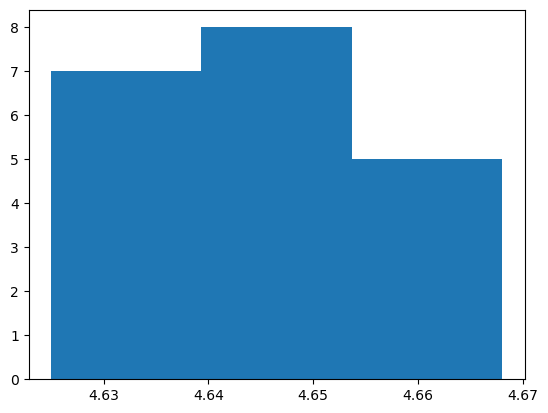

Depending on the number of bins, it will look gaussian 
Note: if we increase the bins to anything larger, it will not look gaussian


In [20]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot as plt

Set2 = read_csv("Set2.csv")
xbars=Set2.mean()

plt.hist(xbars, bins=3)
plt.show()
print("Depending on the number of bins, it will look gaussian \nNote: if we increase the bins to anything larger, it will not look gaussian")

## c

In [108]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot as plt
from numpy import sqrt, mean

Set2 = read_csv("Set2.csv")

xbars=Set2.mean()
std_mean=xbars.std()

stds=mean(std(Set2))/sqrt(len(Set2["x1"]))

print(f"Standard Deviation of the mean: {std_mean:.3f}")
print(f"Calculated Standard Deviation: {stds:.3f}")

Standard Deviation of the mean: 0.013
Calculated Standard Deviation: 0.013


Yup! Matches!

## 5

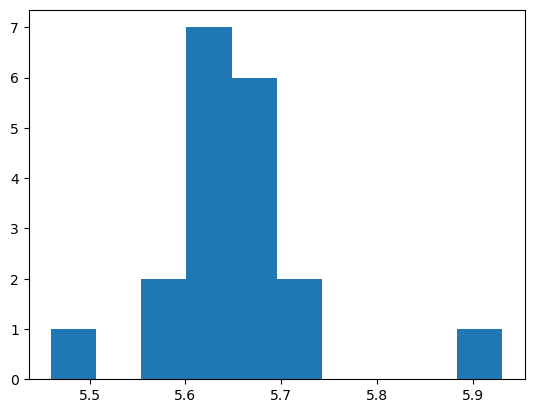

In [68]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot as plt

Set3 = read_csv("Set3.csv")

plt.hist(Set3)
plt.show()

Looking at this histogram, we can see 2 outliers, and we should probably look at both the one that is les than 5.5 and greater than 5.9

In [19]:
from scipy.special import erf,erfinv
from pandas import read_csv, DataFrame
from matplotlib import pyplot as plt
from numpy import sqrt

Set3 = read_csv("Set3.csv")


n_max=(Set3.max()-Set3.mean())/Set3.std()
n_min=(Set3.min()-Set3.mean())/Set3.std()

reject_max=(1-erf(n_max/sqrt(2)))
reject_min=(1-erf(n_min/sqrt(2)))

print(f"Minimum value: {Set3.min()[0]} \nChauvenet's value: {reject_min[0]:.3f}")
print("")
print(f"Maximum value: {Set3.max()[0]} \nChauvenet's value: {reject_max[0]:.3f}")


Minimum value: 5.46 
Chauvenet's value: 1.968

Maximum value: 5.93 
Chauvenet's value: 0.002


Because the Chauvenet's value is larger than the standard rejection value (0.5) for the minimum value, we will keep it, However, for the Maximum value, it is much smaller than the standard 0.5, so it should be rejected.

## 6

In [69]:
x1,dx1=2.6,0.3
x2,dx2=2.8,0.1
x3,dx3=2.7,0.2

new_x=(x1/dx1**2+x2/dx2**2+x3/dx3**2)/(1/dx1**2+1/dx2**2+1/dx3**2)
new_sigma=1/sqrt(1/dx1**2+1/dx2**2+1/dx3**2)
print(f'Overall results: {new_x:.2f} +- {new_sigma:.2f}')

Overall results: 2.77 +- 0.09
